In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import tensorflow as tf
import requests
from tensorflow.python.framework import ops


In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
ops.reset_default_graph()

In [4]:
housing_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
housing_header = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
num_features = len(housing_header)
housing_file = requests.get(housing_url)
housing_data = [[float(x) for x in y.split(' ') if len(x)>=1] for y in housing_file.text.split('\n') if len(y)>=1]

In [5]:
y_vals = np.transpose([np.array([y[len(housing_header)-1] for y in housing_data])])
x_vals = np.array([[x for i,x in enumerate(y) if housing_header[i] in housing_header] for y in housing_data])

In [6]:
print (y_vals)

[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20.9]
 [24.2]
 [21.7]
 [22.8]
 [23.4]
 [24.1]
 [21.4]
 [20. ]
 [20.8]
 [21.2]
 [20.3]
 [28. ]
 [23.9]
 [24.8]
 [22.9]
 [23.9]
 [26.6]
 [22.5]
 [22.2]
 [23.6]
 [28.7]
 [22.6]
 [22. ]
 [22.9]
 [25. ]
 [20.6]
 [28.4]
 [21.4]
 [38.7]
 [43.8]
 [33.2]
 [27.5]
 [26.5]
 [18.6]
 [19.3]
 [20.1]
 [19.5]
 [19.5]
 [20.4]
 [19.8]
 [19.4]
 [21.7]
 [22.8]
 [18.8]
 [18.7]
 [18.5]
 [18.3]
 [21.2]
 [19.2]
 [20.4]
 [19.3]
 [22. ]
 [20.3]
 [20.5]
 [17.3]
 [18.8]


In [7]:
print(x_vals)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]


In [8]:
x_vals = (x_vals - x_vals.min(0)) / x_vals.ptp(0)

In [9]:
print(x_vals)

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 1.00000000e+00
  8.96799117e-02 4.22222222e-01]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 1.00000000e+00
  2.04470199e-01 3.68888889e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 9.89737254e-01
  6.34657837e-02 6.60000000e-01]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.07891832e-01 4.20000000e-01]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 9.91300620e-01
  1.31070640e-01 3.77777778e-01]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.69701987e-01 1.53333333e-01]]


In [10]:
random.seed(12345)
train_indices = np.random.choice(len(x_vals), int(len(x_vals)*0.75), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [11]:
batch_size=len(x_vals_test)

In [12]:
x_data_train = tf.placeholder(shape=[None, num_features], dtype=tf.float32)
x_data_test = tf.placeholder(shape=[None, num_features], dtype=tf.float32)
y_target_train = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target_test = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [13]:
distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test,1))), axis=2)

In [14]:
def kNN(k): 
    topK_X, topK_indices = tf.nn.top_k(tf.negative(distance), k=k)
    x_sums = tf.expand_dims(tf.reduce_sum(topK_X, 1), 1)
    x_sums_repeated = tf.matmul(x_sums,tf.ones([1, k], tf.float32))
    x_val_weights = tf.expand_dims(tf.div(topK_X, x_sums_repeated), 1)

    topK_Y = tf.gather(y_target_train, topK_indices)
    prediction = tf.squeeze(tf.matmul(x_val_weights,topK_Y), axis=[1])

    mse = tf.div(tf.reduce_sum(tf.square(tf.subtract(prediction, y_target_test))), batch_size)

    num_loops = int(np.ceil(len(x_vals_test)/batch_size))

    init_op = tf.global_variables_initializer()

    with tf.Session() as sess:
            sess.run(init_op) 
            for i in range(num_loops):
                min_index = i*batch_size
                max_index = min((i+1)*batch_size,len(x_vals_train))
                x_batch = x_vals_test[min_index:max_index]
                y_batch = y_vals_test[min_index:max_index]
                predictions = sess.run(prediction, feed_dict={x_data_train: x_vals_train, x_data_test: x_batch, y_target_train: y_vals_train, y_target_test: y_batch})
                batch_mse = sess.run(mse, feed_dict={x_data_train: x_vals_train, x_data_test: x_batch, y_target_train: y_vals_train, y_target_test: y_batch})           
    return batch_mse

In [15]:
mse_list = []
k_list = []
def getOptimalMSE_K():
    mse = 0.0
    for k in range(2, 11):
        mse = kNN(k)  
        mse_list.append(mse)
        k_list.append(k)
    return k_list, mse_list 

In [16]:
k_list, mse_list  = getOptimalMSE_K()
dict_list = zip(k_list, mse_list)
my_dict = dict(dict_list)
print(my_dict)
optimal_k = min(my_dict, key=my_dict.get)

{2: 18.167213, 3: 13.356985, 4: 12.306506, 5: 12.453666, 6: 14.747253, 7: 15.529496, 8: 17.534348, 9: 18.231802, 10: 17.658434}


In [17]:
print("Optimal K value: ", optimal_k)
mse = min(mse_list)
print("Minimum mean square error: ", mse)

Optimal K value:  4
Minimum mean square error:  12.306506


In [18]:
def bestKNN(k): 
    topK_X, topK_indices = tf.nn.top_k(tf.negative(distance), k=k)
    x_sums = tf.expand_dims(tf.reduce_sum(topK_X, 1), 1)
    x_sums_repeated = tf.matmul(x_sums,tf.ones([1, k], tf.float32))
    x_val_weights = tf.expand_dims(tf.div(topK_X, x_sums_repeated), 1)

    topK_Y = tf.gather(y_target_train, topK_indices)
    prediction = tf.squeeze(tf.matmul(x_val_weights,topK_Y), axis=[1])

    num_loops = int(np.ceil(len(x_vals_test)/batch_size))

    init_op = tf.global_variables_initializer()

    with tf.Session() as sess:
            sess.run(init_op) 
            for i in range(num_loops):
                min_index = i*batch_size
                max_index = min((i+1)*batch_size,len(x_vals_train))
                x_batch = x_vals_test[min_index:max_index]
                y_batch = y_vals_test[min_index:max_index]
                predictions = sess.run(prediction, feed_dict={x_data_train: x_vals_train, x_data_test: x_batch, y_target_train: y_vals_train, y_target_test: y_batch})
    return predictions, y_batch


In [19]:
predicted_labels, actual_labels  = bestKNN(optimal_k)

In [20]:

def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
	    if(np.round(testSet[x]) == np.round(predictions[x])):
                correct += 1
	return (correct/float(len(testSet))) * 100.0
accuracy = getAccuracy(actual_labels, predicted_labels)

print('Accuracy: ' + repr(accuracy) + '%')


Accuracy: 14.960629921259844%


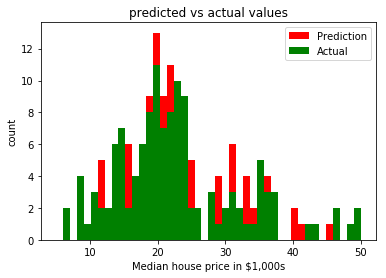

In [21]:
bins = np.linspace(5, 50, 45)
plt.hist(predicted_labels, bins, alpha=1.0, facecolor='red', label='Prediction')
plt.hist(actual_labels, bins, alpha=1.0, facecolor='green', label='Actual')
plt.title('predicted vs actual values')
plt.xlabel('Median house price in $1,000s')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.show()